# Confusion Matrix

- Accuracy: Test datalarını sınıflandırıp,tahmin edip yüzde kacini dogru tahmin ettigimi yazdiriyorum.

- Bir datada kedi ve köpek olarak iki sinif olsun accuracy ise %80 olsun.
- Burada ben kopeklerin ne kadarini kedi veya kedilerin ne kadarinin kopek olarak bildigini ogrenemem bunun icin confusion matrix kullaniyoruz.

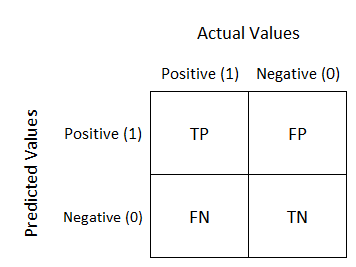

In [1]:
from IPython.display import Image
Image(filename='foto/cm.png') 

- Doğruya doğru demek (True Positive – TP) DOĞRU
- Yanlışa yanlış demek (True Negative – TN) DOĞRU
- Doğruya yanlış demek (False Positive – FP) YANLIŞ
- Yanlışa doğru demek(False Negative – FN) YANLIŞ

- Özellikle unbalance datalar icin cok önemlidir. 
- Örneğin: 1000000 verimiz olsun. Bunun 990000 tanesi kedi ve 10000 tanesi ise kopek olsun. Ve modelimiz hepsini kedi olarak tahmin etsin. Accuracy: 990000 / 10000 = 0.99 cikar. Yani accuracy cok iyi bir tahmin yaptigimi soyluyor fakat ben hicbir kopegi dogru tahmin edemedim bu gibi durumlar icin confusion matrix kullanmak bu gibi sorunlari gormemize yardimci olur.

In [2]:
import pandas as pd
import numpy as np
#%%  import data

data = pd.read_csv("data/data.csv")
data.drop(["id","Unnamed: 32"],axis=1,inplace = True)

# %%
data.diagnosis = [ 1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)
#%% normalization

x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

# %% train test split
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size = 0.15,random_state = 42)

#%% decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

print("decision tree score: ", dt.score(x_test,y_test))

#%%  random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100,random_state = 1)
rf.fit(x_train,y_train)
print("random forest algo result: ",rf.score(x_test,y_test))

decision tree score:  0.9069767441860465
random forest algo result:  0.9534883720930233


In [4]:
y_pred=rf.predict(x_test)
y_true=y_test

In [6]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_true,y_pred)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

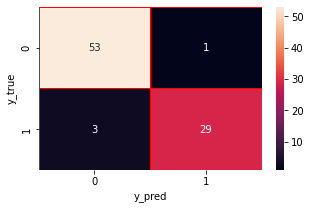

In [10]:
f,ax=plt.subplots(figsize=(5,3))
sns.heatmap(cm,annot=True, linewidths=0.5,linecolor="red", fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()